## In this Notebook, we train models for portrait quality prediction
#### date: v0 - 01/08/2020

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
os.chdir(r'C:\Users\Jean\Documents\GitHub\the-good-face-app\api')

In [6]:
pd.set_option('display.max_columns', None) 

### Step0. we load the features dataset and clean it

In [138]:
data_set=pd.read_csv('./labellized_dataset_feat.csv', index_col=0)

In [139]:
data_set.head()

,filename,label_portrait,pixel_X,pixel_Y,max_I,min_I,mean_I,std_I,type,face_area,eye_status,tot_eye_area,face_angle,smile_status,smile_area,glasses_status,glasses_area,blurry_rate,light_percent,dark_percent,APW_rate,face_%,smile_%
0,43_0_0_20170104181239741.jpg,1.0,284,367,255,0,85.2,59.9,face,44100,eyes_NOK,6166,0.0,smile_YES,8712,glasses_NO,0,113.83,0.00,85.92,3.66,42.0,20.0
1,32_0_0_20170117133625422.jpg,0.0,738,1103,248,0,100.9,76.7,face,62001,2_eyes_OK,4705,13.8,smile_YES,9453,glasses_NO,0,22.60,24.99,55.09,2.36,8.0,15.0
2,43_1_4_20170117204021688.jpg,1.0,830,983,246,0,171.9,58.2,face,113569,2_eyes_OK,9113,6.7,smile_YES,20402,glasses_NO,0,7.63,90.17,0.00,0.05,14.0,18.0
3,27_1_3_20170117180032189.jpg,0.0,966,803,207,2,87.1,51.7,face_pb,0,eyes_NOK,0,0.0,smile_NO,0,glasses_NO,0,11.18,0.00,92.16,1.90,0.0,NaN
4,48_0_0_20170104213027877.jpg,0.0,406,499,246,0,91.1,45.9,face,31329,eyes_NOK,1369,0.0,smile_NO,0,glasses_NO,0,59.29,0.00,26.89,4.32,15.0,0.0


In [140]:
data_set.isnull().sum()

filename            0
label_portrait      2
pixel_X             0
pixel_Y             0
max_I               0
min_I               0
mean_I              0
std_I               0
type                0
face_area           0
eye_status          0
tot_eye_area        0
face_angle          0
smile_status        0
smile_area          0
glasses_status      0
glasses_area        0
blurry_rate         0
light_percent       0
dark_percent        0
APW_rate            0
face_%              0
smile_%           160
dtype: int64

2 labels are missing => we drop, 160 smile_% are missing => we fill by 0

In [141]:
data_set["smile_%"]=data_set["smile_%"].fillna(0)
data_set=data_set.dropna()

In [142]:
data_set.filename.dtypes

dtype('O')

### Step1. we change the object columns into category columns and replace them with codes

In [143]:
# we loop on the columns to change from object to category data
data_set_columns=data_set.columns

In [144]:
for i in data_set_columns[1:]:
    if data_set[i].dtypes=='O':
        data_set[i]=data_set[i].astype("category").cat.codes
        

In [13]:
data_set.head(10)

,filename,label_portrait,pixel_X,pixel_Y,max_I,min_I,mean_I,std_I,type,face_area,eye_status,tot_eye_area,face_angle,smile_status,smile_area,glasses_status,glasses_area,blurry_rate,light_percent,dark_percent,APW_rate,face_%,smile_%
0,43_0_0_20170104181239741.jpg,1.0,284,367,255,0,85.2,59.9,0,44100,1,6166,0.00,1,8712,0,0,113.83,0.00,85.92,3.66,42.0,20.0
1,32_0_0_20170117133625422.jpg,0.0,738,1103,248,0,100.9,76.7,0,62001,0,4705,13.80,1,9453,0,0,22.60,24.99,55.09,2.36,8.0,15.0
2,43_1_4_20170117204021688.jpg,1.0,830,983,246,0,171.9,58.2,0,113569,0,9113,6.70,1,20402,0,0,7.63,90.17,0.00,0.05,14.0,18.0
3,27_1_3_20170117180032189.jpg,0.0,966,803,207,2,87.1,51.7,1,0,1,0,0.00,0,0,0,0,11.18,0.00,92.16,1.90,0.0,0.0
4,48_0_0_20170104213027877.jpg,0.0,406,499,246,0,91.1,45.9,0,31329,1,1369,0.00,0,0,0,0,59.29,0.00,26.89,4.32,15.0,0.0
5,26_1_2_20170116180223543.jpg,0.0,414,659,255,0,47.1,65.6,1,0,1,0,0.00,0,0,0,0,33.17,0.41,99.59,11.56,0.0,0.0
6,26_1_3_20170104232139409.jpg,0.0,224,359,255,1,146.9,57.6,0,5929,1,0,0.00,1,990,0,0,184.97,6.37,0.00,6.64,7.0,17.0
7,30_0_0_20170116222414030.jpg,1.0,742,963,235,28,165.8,31.4,0,100489,1,3136,0.00,1,18915,0,0,2.80,16.63,0.00,0.00,14.0,19.0
8,34_0_0_20170114031602748.jpg,1.0,738,1103,254,0,140.4,71.4,0,271441,0,21013,0.75,1,40755,0,0,10.40,54.12,6.33,0.51,33.0,15.0
9,60_1_0_20170110183850108.jpg,0.0,400,599,241,0,102.9,67.1,0,7225,1,0,0.00,1,1352,0,0,832.56,0.10,82.02,7.13,3.0,19.0


### Step 1.2: we analyse the features and thei impact on label, are there any correlations?

In [145]:
import scipy.stats as stats

In [150]:
#target analysis  
display(data_set.label_portrait.value_counts())
display(data_set.label_portrait.value_counts()/data_set.shape[0])

0.0    735
1.0    304
Name: label_portrait, dtype: int64

0.0    0.707411
1.0    0.292589
Name: label_portrait, dtype: float64

In [148]:
def extract_stats_feat(df, feat):
    df_1=df[df.label_portrait==1].loc[:, feat]
    df_0=df[df.label_portrait==0].loc[:, feat]
    mean_feat_1, std_feat_1, len_feat_1=np.mean(df_1), np.std(df_1), len(df_1)
    mean_feat_0, std_feat_0, len_feat_0=np.mean(df_0), np.std(df_0), len(df_0)
    fvalue, pvalue = stats.f_oneway(df_1, df_0)
    
    plt.figure()
    plt.hist(df_1, label='good', alpha=0.5, bins='auto')
    plt.hist(df_0, label='not good', alpha=0.5, bins='auto')
    plt.grid()
    plt.legend()
    plt.title(feat)
    return [feat, mean_feat_1, std_feat_1, len_feat_1, mean_feat_0, std_feat_0, len_feat_0, pvalue]

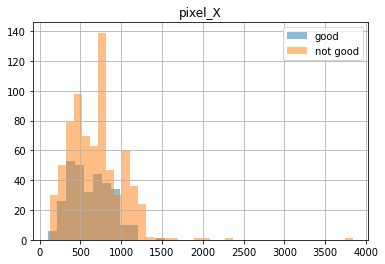

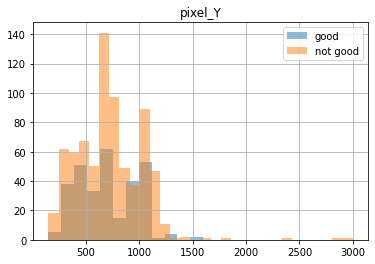

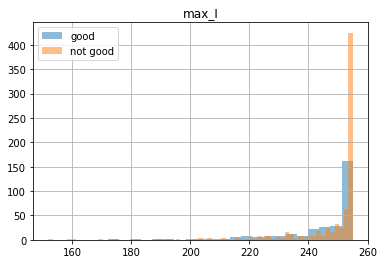

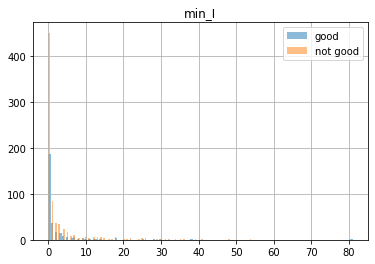

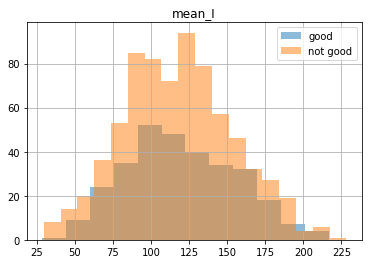

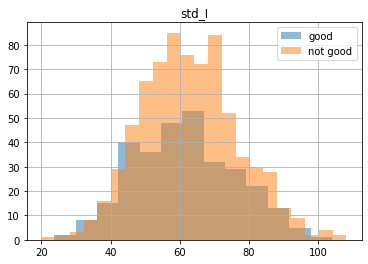

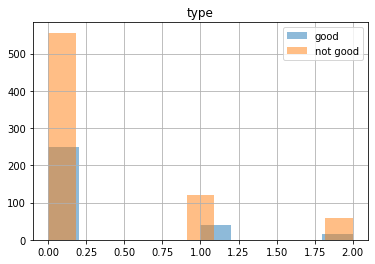

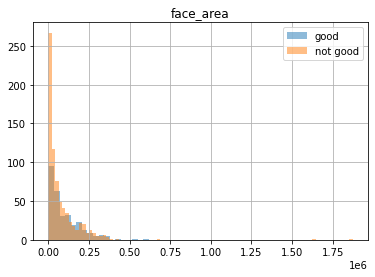

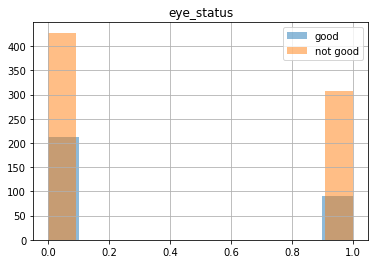

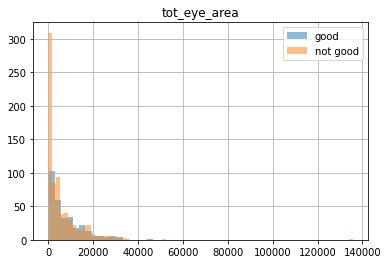

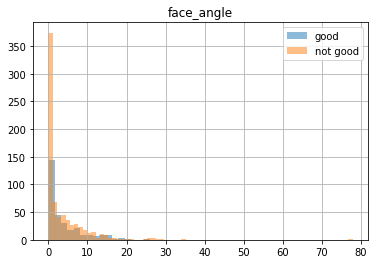

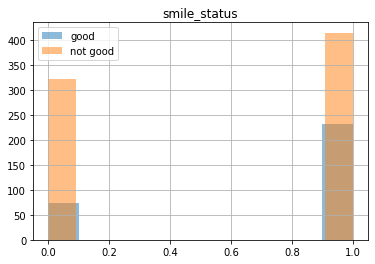

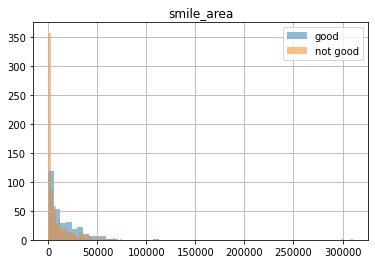

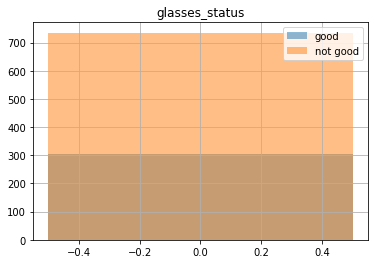

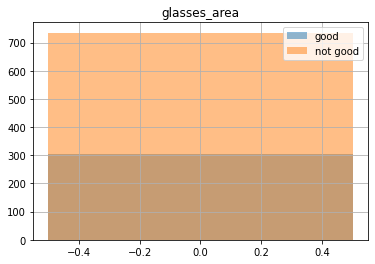

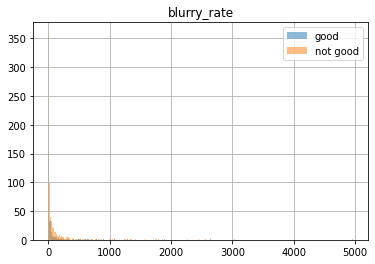

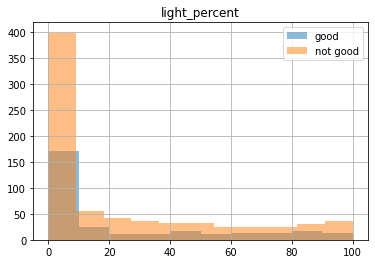

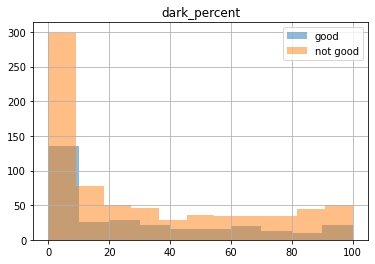

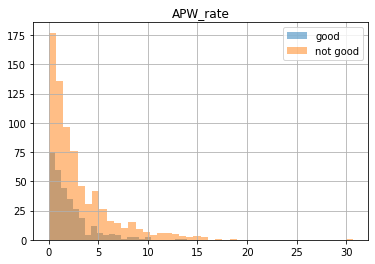

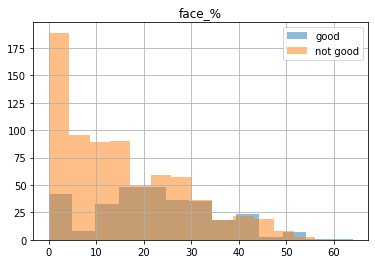

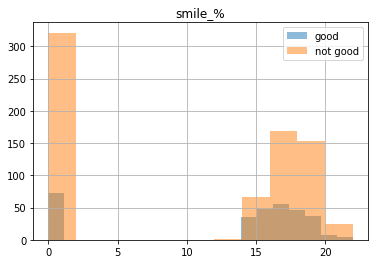

In [151]:
results=[]
for my_col in data_set.columns[2:]:
    results.append(extract_stats_feat(data_set, my_col))
df_results_feat=pd.DataFrame(results, columns=['feat', 'mean_feat_1', 'std_feat_1', 'len_feat_1', 'mean_feat_0', 'std_feat_0', 'len_feat_0', 'pvalue'])

In [152]:
df_results_feat=df_results_feat.sort_values('pvalue')

In [153]:
df_results_feat

,feat,mean_feat_1,std_feat_1,len_feat_1,mean_feat_0,std_feat_0,len_feat_0,pvalue
19,face_%,22.042763,13.376192,304,15.144218,13.103809,735,4.072163e-14
11,smile_status,0.759868,0.427163,304,0.563265,0.495981,735,2.144394e-09
20,smile_%,13.029605,7.446461,304,9.668027,8.597975,735,3.671238e-09
18,APW_rate,2.085789,2.143446,304,3.004735,3.309384,735,8.885487e-06
12,smile_area,14588.125000,16003.654099,304,9227.541497,20378.310221,735,4.647384e-05
8,eye_status,0.299342,0.457970,304,0.417687,0.493178,735,3.479519e-04
0,pixel_X,619.746711,245.372498,304,691.644898,325.454329,735,5.569384e-04
9,tot_eye_area,7707.016447,7865.843138,304,5744.096599,8688.618936,735,6.974670e-04
2,max_I,245.565789,14.277407,304,248.434014,13.073656,735,1.813584e-03
7,face_area,98941.529605,97969.605566,304,77540.465306,123875.579918,735,7.428093e-03


we drop features where the pvalue between 2 populations is > 0.05

In [154]:
list_features_impact=df_results_feat[df_results_feat.pvalue<0.05].feat.tolist()

we linearize skewed features and remove outliers

In [155]:
data_set.describe()

,label_portrait,pixel_X,pixel_Y,max_I,min_I,mean_I,std_I,type,face_area,eye_status,tot_eye_area,face_angle,smile_status,smile_area,glasses_status,glasses_area,blurry_rate,light_percent,dark_percent,APW_rate,face_%,smile_%
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1.039000e+03,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.0,1039.0,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,0.292589,670.608277,712.828681,247.594803,2.483157,118.513763,62.556015,0.296439,8.380218e+04,0.383061,6318.425409,3.539278,0.620789,10795.989413,0.0,0.0,110.739413,23.643167,30.391434,2.735861,17.162656,10.651588
std,0.455170,306.113677,291.883620,13.506739,6.392995,36.298590,14.235616,0.592744,1.173528e+05,0.486367,8507.292342,5.529483,0.485424,19365.334469,0.0,0.0,322.433691,31.103527,32.570324,3.045579,13.559031,8.421797
min,0.000000,107.000000,150.000000,152.000000,0.000000,28.500000,20.200000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,445.000000,481.000000,246.000000,0.000000,91.500000,52.350000,0.000000,1.416100e+04,0.000000,400.000000,0.000000,0.000000,0.000000,0.0,0.0,9.090000,0.000000,1.215000,0.710000,6.000000,0.000000
50%,0.000000,658.000000,699.000000,254.000000,0.000000,117.800000,62.000000,0.000000,4.622500e+04,0.000000,3613.000000,1.290000,1.000000,4232.000000,0.0,0.0,17.990000,5.400000,15.720000,1.700000,15.000000,16.000000
75%,1.000000,832.000000,921.000000,255.000000,2.000000,143.200000,71.850000,0.000000,1.204090e+05,1.000000,9249.000000,5.115000,1.000000,14835.000000,0.0,0.0,66.590000,43.405000,56.065000,3.550000,26.000000,18.000000
max,1.000000,3840.000000,3000.000000,255.000000,81.000000,228.300000,108.200000,2.000000,1.874161e+06,1.000000,135725.000000,77.910000,1.000000,310472.000000,0.0,0.0,4961.380000,100.000000,100.000000,30.650000,64.000000,22.000000


In [156]:
data_set.isnull().sum().sum()

0

In [157]:
list_skewed=['max_I','min_I','face_area','tot_eye_area','face_angle','smile_area','blurry_rate','light_percent','dark_percent','APW_rate','face_%']

In [158]:
def log_transform(df,col):
    new_col=[np.log10(my_val+1) if my_val+1>0 else 0 for my_val in df[col]]
    return new_col

In [159]:
def attribute_outliers(df, column):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    new_col=[lower_bound if my_val < lower_bound else my_val if my_val<upper_bound else upper_bound for my_val in df[column]]
    return new_col

In [163]:
for my_col in list_skewed:
    data_set[my_col+'_trans']=log_transform(data_set,my_col)
    data_set[my_col+'_trans']=attribute_outliers(data_set,my_col+'_trans')
    #we drop original column
    data_set=data_set.drop(my_col, axis=1)

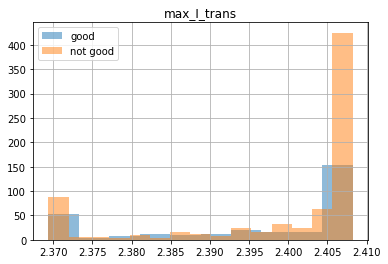

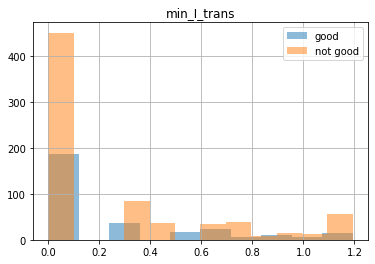

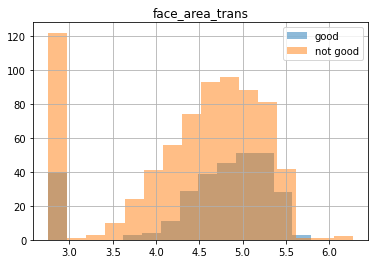

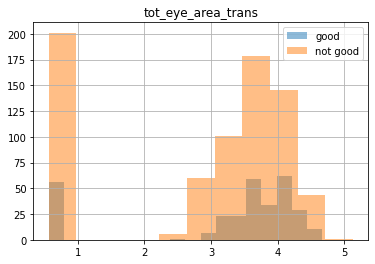

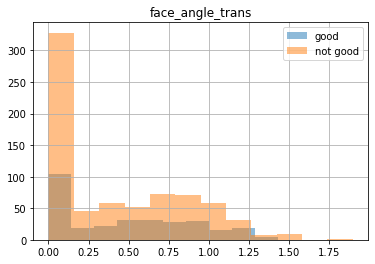

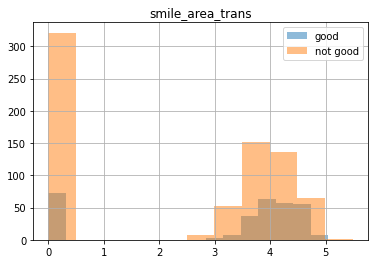

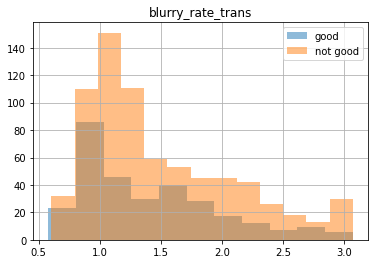

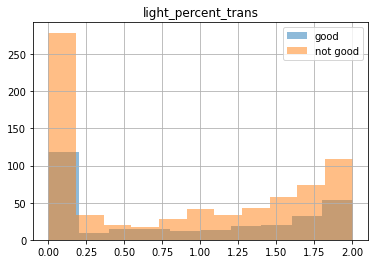

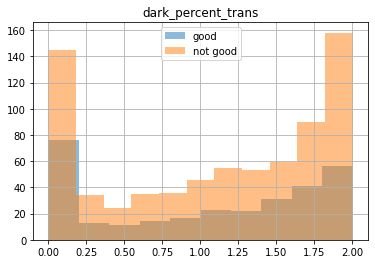

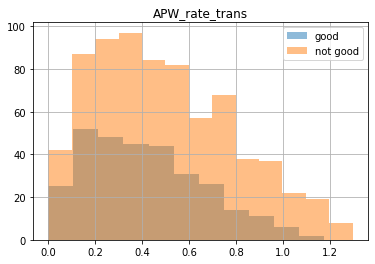

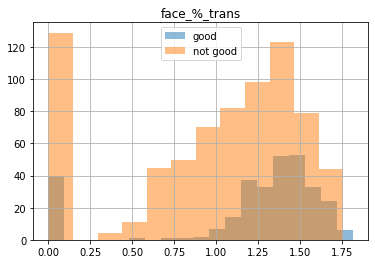

In [164]:
results=[]
for my_col in [my_col for my_col in data_set.columns[2:] if 'trans' in my_col]:
    results.append(extract_stats_feat(data_set, my_col))
df_results_feat_trans=pd.DataFrame(results, columns=['feat', 'mean_feat_1', 'std_feat_1', 'len_feat_1', 'mean_feat_0', 'std_feat_0', 'len_feat_0', 'pvalue'])

In [165]:
df_results_feat_trans=df_results_feat_trans.sort_values('pvalue')

In [166]:
df_results_feat_trans

,feat,mean_feat_1,std_feat_1,len_feat_1,mean_feat_0,std_feat_0,len_feat_0,pvalue
5,smile_area_trans,3.139874,1.796765,304,2.236259,1.999832,735,1.598715e-11
10,face_%_trans,1.198777,0.501486,304,0.979393,0.533628,735,1.256231e-09
9,APW_rate_trans,0.411928,0.247410,304,0.492815,0.294598,735,2.798188e-05
3,tot_eye_area_trans,3.221955,1.312844,304,2.819398,1.443553,735,2.988299e-05
0,max_I_trans,2.395944,0.014669,304,2.399692,0.013173,735,6.023676e-05
2,face_area_trans,4.611007,0.814864,304,4.380148,0.861428,735,7.126519e-05
6,blurry_rate_trans,1.404555,0.563645,304,1.496160,0.604227,735,2.374612e-02
4,face_angle_trans,0.472699,0.420652,304,0.409969,0.435178,735,3.320602e-02
8,dark_percent_trans,1.042045,0.729454,304,1.101125,0.713085,735,2.282210e-01
1,min_I_trans,0.243981,0.358640,304,0.259487,0.384161,735,5.467965e-01


In [167]:
list_features_impact2=df_results_feat_trans[df_results_feat_trans.pvalue<0.05].feat.tolist()

In [168]:
list_features_impact, list_features_impact2

(['face_%',
  'smile_status',
  'smile_%',
  'APW_rate',
  'smile_area',
  'eye_status',
  'pixel_X',
  'tot_eye_area',
  'max_I',
  'face_area',
  'type'],
 ['smile_area_trans',
  'face_%_trans',
  'APW_rate_trans',
  'tot_eye_area_trans',
  'max_I_trans',
  'face_area_trans',
  'blurry_rate_trans',
  'face_angle_trans'])

In [169]:
data_set_train=data_set

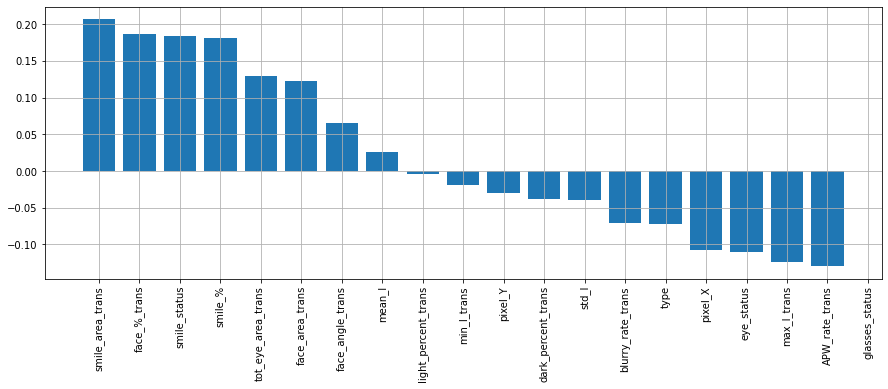

In [170]:
#Get Correlation of "good portrait" with other variables:
plt.figure(figsize=(15,5))
corr_factor=data_set_train.corr()['label_portrait'].sort_values(ascending = False)
plt.bar(corr_factor.index[1:],corr_factor.iloc[1:])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [171]:
list_col_corr_factor=corr_factor[np.abs(corr_factor)>0.05].index.tolist()

In [172]:
data_set_train=data_set[list_col_corr_factor+['filename']]


In [173]:
data_set_train.shape

(1039, 15)

In [174]:
data_set_train.dtypes

label_portrait        float64
smile_area_trans      float64
face_%_trans          float64
smile_status             int8
smile_%               float64
tot_eye_area_trans    float64
face_area_trans       float64
face_angle_trans      float64
blurry_rate_trans     float64
type                     int8
pixel_X                 int64
eye_status               int8
max_I_trans           float64
APW_rate_trans        float64
filename               object
dtype: object

We do probability attribution of categorical variables

In [192]:
def proba_cat_variables(df, my_col, target_col):
    list_cat=df[my_col].unique()
    dict_proba={}
    for my_val in list_cat:
        dict_proba[str(my_val)]=df[df[my_col]==my_val].loc[:,target_col].sum()/df.shape[0]
    df[my_col+'_trans_cat']=df[my_col].astype(str).map(dict_proba)
    df=df.drop(my_col, axis=1)
    return df

In [193]:
for my_col in ['smile_status','type','eye_status']:
    data_set_train=proba_cat_variables(data_set_train, my_col, 'label_portrait')

In [194]:
data_set_train

,label_portrait,smile_area_trans,face_%_trans,smile_%,tot_eye_area_trans,face_area_trans,face_angle_trans,blurry_rate_trans,pixel_X,max_I_trans,APW_rate_trans,filename,eye_status_trans_cat,smile_status_trans_cat,type_trans_cat
0,1.0,3.940168,1.633468,20.0,3.790074,4.644448,0.000000,2.060055,284,2.408240,0.668386,43_0_0_20170104181239741.jpg,0.087584,0.222329,0.239654
1,0.0,3.975616,0.954243,15.0,3.672652,4.792406,1.170262,1.372912,738,2.396199,0.526339,32_0_0_20170117133625422.jpg,0.205005,0.222329,0.239654
2,1.0,4.309694,1.176091,18.0,3.959709,5.055264,0.886491,0.936011,830,2.392697,0.021189,43_1_4_20170117204021688.jpg,0.205005,0.222329,0.239654
3,0.0,0.000000,0.000000,0.0,0.558648,2.756818,0.000000,1.085647,966,2.369382,0.462398,27_1_3_20170117180032189.jpg,0.087584,0.070260,0.038499
4,0.0,0.000000,1.204120,0.0,3.136721,4.495960,0.000000,1.780245,406,2.392697,0.725912,48_0_0_20170104213027877.jpg,0.087584,0.070260,0.239654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,0.0,0.000000,0.477121,0.0,3.114611,4.158393,0.799341,1.136086,782,2.406540,0.459392,40_1_1_20170116162028041.jpg,0.205005,0.070260,0.239654
1037,0.0,0.000000,1.113943,0.0,2.986324,3.964590,0.454845,2.359817,232,2.408240,0.962369,31_1_3_20170104232529874.jpg,0.205005,0.070260,0.239654
1038,0.0,3.801335,1.146128,18.0,3.568084,4.548328,0.760422,1.090611,426,2.408240,0.193125,38_1_1_20170112231328158.jpg,0.205005,0.222329,0.239654
1039,1.0,3.034227,1.491362,17.0,0.558648,3.806248,0.000000,2.468347,131,2.397940,1.173478,60_1_0_20170110122614299.jpg,0.087584,0.222329,0.239654


### Step2. we train ML classification model

#### Imports for training

In [236]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score, brier_score_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV

#### New training function

In [255]:
#Defining the modelling function WITH resample
def modeling_resamp(df, resample_fact, alg, alg_name, params={}, proba=0.5, grid_search=None, grid_search_param={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    
    #first we split
    df_train, df_test = train_test_split(df, test_size=0.25, random_state=50, stratify=df['label_portrait'])
    print(df_train.shape,df_test.shape)
    test_filename=df_test.filename
    if resample_fact !=None:
        #then we resample df_train
        df_class1=df_train[df_train.label_portrait==1]
        df_class0=df_train[df_train.label_portrait==0]
        size1=df_class1.shape[0]
        df_class0_downsample = resample(df_class0,replace=True,n_samples=int(size1*resample_fact),random_state=42)
        df_train_new=pd.concat([df_class1, df_class0_downsample], axis=0).reset_index(drop=True) 
    else:
        df_train_new=df_train
    X_train= df_train_new.drop(['filename','label_portrait'], axis=1)
    list_feat_col=X_train.columns
    y_train = df_train_new['label_portrait']
    X_test=df_test.drop(['filename','label_portrait'], axis=1)
    y_test=df_test['label_portrait']
  
    #then we scale only numerical features
#     X_train_num=X_train.drop(['eye_status_trans_cat','smile_status_trans_cat','type_trans_cat'], axis=1)
#     X_test_num=X_test.drop(['eye_status_trans_cat','smile_status_trans_cat','type_trans_cat'], axis=1)
#     scaler = StandardScaler()
#     X_train_num=scaler.fit_transform(X_train_num)
#     X_test_num=scaler.transform(X_test_num)
    
#     X_train=pd.concat([pd.DataFrame(X_train_num), X_train[['eye_status_trans_cat','smile_status_trans_cat','type_trans_cat']].reset_index(drop=True)], axis=1)
#     X_test=pd.concat([pd.DataFrame(X_test_num), X_test[['eye_status_trans_cat','smile_status_trans_cat','type_trans_cat']].reset_index(drop=True)], axis=1)
    
    #we scale all features
    scaler = MinMaxScaler((0,1))
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    if grid_search!=None:
        # search across 100 different combinations, and use all available cores
        model = RandomizedSearchCV(estimator = model, param_distributions = grid_search_param, n_iter = 500, cv = 3, verbose=1, random_state=42, n_jobs = -1, scoring='roc_auc')

        # Fit the random search model
        model.fit(X_train, y_train)

        #then we compute model
        print(model.best_params_)
        model = model.best_estimator_
    
    else:
        #then we compute model
        model.fit(X_train, y_train)
    
    #prediction with rob_threshold
    def predict_with_threshold(model, X, threshold=0.5):
        """
        Predict class using a threshold on the predicted probability
        Parameters:
            model : an sklearn model object
            X : dataset features
            threshold : threshold on the predicted probability
        Returns:
            y_pred : the predicted class
        """
        y_proba = model.predict_proba(X)[:, 1]
        y_pred = [1 if y>= threshold else 0 for y in y_proba]
        return y_pred
    
    y_pred = predict_with_threshold(model,X_test, threshold=proba)
    y_pred_train=predict_with_threshold(model,X_train, threshold=proba)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred, label='test'):
        print('\n')
        print(alg_name, ' performance on {}'.format(label))
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)
    
    print_scores(alg, y_test, y_pred, 'test')
    
    #confusion matrix on test
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d')
    plt.title('confusion matrix at threshold={} on TEST'.format(proba))
    plt.show()
    
    # predict the probability of positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    # compute AUC
    auc = roc_auc_score(y_test, y_proba)
    # compute Brier score
    brier = brier_score_loss(y_test, y_proba)
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Plotting the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    # Plotting the probability
    plt.plot(fpr, thresholds, color='blue', lw=2, label='Probability')
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()

    print("AUC: {:.3f}".format(auc))
    print("Brier Score: {:.3f}".format(brier))
    
    #print scores on train to check for overfitting
    print_scores(alg, y_train, y_pred_train, 'train')
    
    #features importance
    try:
        importance = model.feature_importances_

        # Sorting features by importance
        feature_importance = sorted(zip(importance, range(len(importance))), reverse=True)

        # Plotting the feature importance
        plt.bar([x for x in range(len(feature_importance))], [y[0] for y in feature_importance])
        plt.xticks([x for x in range(len(feature_importance))], [list_feat_col[y[1]] for y in feature_importance], rotation=90)
        plt.xlabel('Feature importance')
        plt.show()
    except:
        pass

    # build the dataframe object
    df_ok=df[df.filename.isin(test_filename)]
    print(df_ok.shape)
    df_ok=df_ok[['filename','label_portrait']]
    df_ok['predicted_proba']=y_proba
    
    return model, scaler, df_ok

(779, 15) (260, 15)


Logistic Regression  performance on test
accuracy:  0.6961538461538461
precision:  0.4117647058823529
recall:  0.09210526315789473
f1_score:  0.6207642524934962


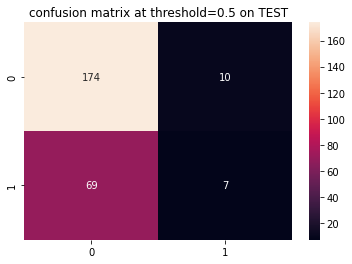

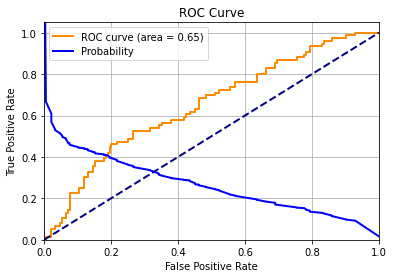

AUC: 0.650
Brier Score: 0.197


Logistic Regression  performance on train
accuracy:  0.7150192554557124
precision:  0.55
recall:  0.14473684210526316
f1_score:  0.6507489917418858
(260, 15)


In [256]:
log_model,scaler, df_ok= modeling_resamp(data_set_train, None, LogisticRegression, 'Logistic Regression')

(779, 15) (260, 15)


Standard Vector Classifier  performance on test
accuracy:  0.676923076923077
precision:  0.3181818181818182
recall:  0.09210526315789473
f1_score:  0.6085828863080048


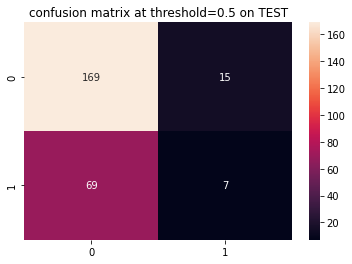

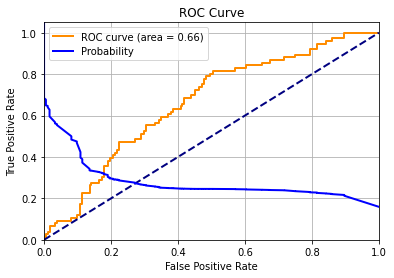

AUC: 0.663
Brier Score: 0.203


Standard Vector Classifier  performance on train
accuracy:  0.7291399229781772
precision:  0.6197183098591549
recall:  0.19298245614035087
f1_score:  0.6749162454181755
(260, 15)


In [230]:
params={'probability':True}
log_model,scaler, df_ok= modeling_resamp(data_set_train, None, SVC, 'Standard Vector Classifier', params)

(779, 15) (260, 15)


RandomForestClassifier  performance on test
accuracy:  0.7115384615384616
precision:  0.5172413793103449
recall:  0.19736842105263158
f1_score:  0.6633125910234343


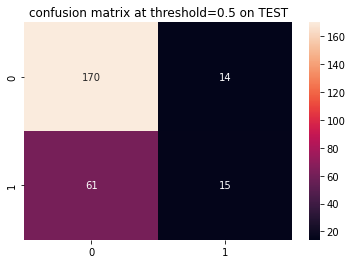

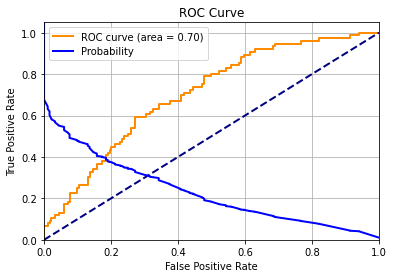

AUC: 0.704
Brier Score: 0.187


RandomForestClassifier  performance on train
accuracy:  0.9319640564826701
precision:  0.9781420765027322
recall:  0.7850877192982456
f1_score:  0.9295740806764371


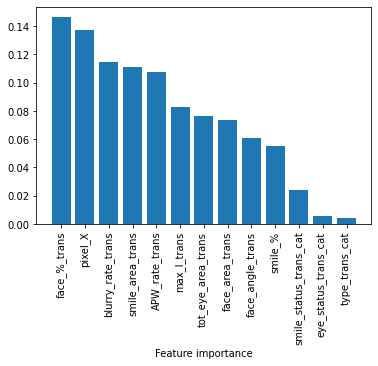

(260, 15)


In [231]:
params={'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
log_model,scaler, df_ok= modeling_resamp(data_set_train, None, RandomForestClassifier, 'RandomForestClassifier', params)

In [251]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2,10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 6, 8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [2, 3, 4, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12], 'bootstrap': [True, False]}


(779, 15) (260, 15)
Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


RandomForestClassifier  performance on test
accuracy:  0.7153846153846154
precision:  0.5416666666666666
recall:  0.17105263157894737
f1_score:  0.6590036630036631


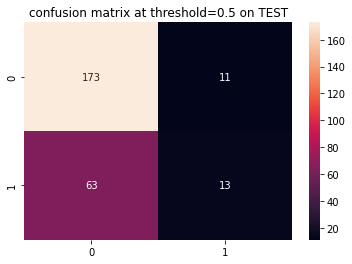

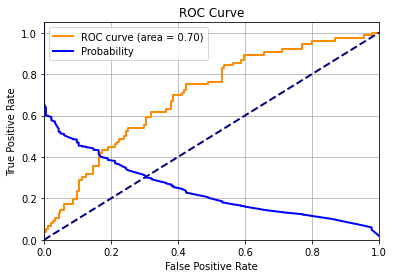

AUC: 0.696
Brier Score: 0.188


RandomForestClassifier  performance on train
accuracy:  0.8421052631578947
precision:  0.8947368421052632
recall:  0.5219298245614035
f1_score:  0.8275953040495978


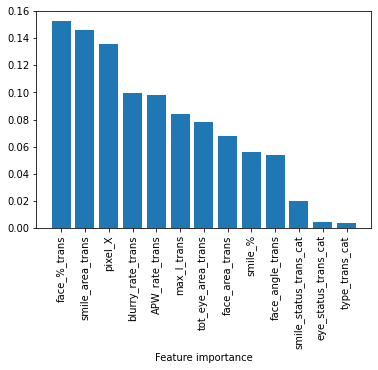

(260, 15)


In [257]:
params={}
log_model,scaler, df_ok= modeling_resamp(data_set_train, None, RandomForestClassifier, 'RandomForestClassifier', params, 0.5, 'YES', random_grid)

(779, 15) (260, 15)


KNeighborsClassifier  performance on test
accuracy:  0.6346153846153846
precision:  0.37333333333333335
recall:  0.3684210526315789
f1_score:  0.6339006028878424


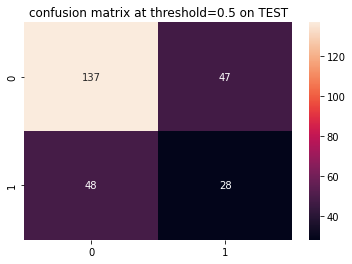

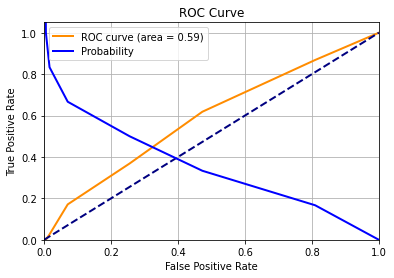

AUC: 0.591
Brier Score: 0.224


KNeighborsClassifier  performance on train
accuracy:  0.7445442875481386
precision:  0.5582329317269076
recall:  0.6096491228070176
f1_score:  0.7476862267968151
(260, 15)


In [232]:
params={'n_neighbors':6,'weights':'uniform'}
log_model,scaler, df_ok= modeling_resamp(data_set_train, None, KNeighborsClassifier, 'KNeighborsClassifier', params)

In [258]:
# Number of trees in gradient boosting
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 6, 8, 10, 12]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2,10, num = 5)]
max_depth.append(None)
#learning_rate
learning_rate=[0.01, 0.05, 0.1, 0.2, 0.5, 1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
              'learning_rate':learning_rate}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [2, 3, 4, 6, 8, 10, 12], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1]}


(779, 15) (260, 15)
Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'n_estimators': 120, 'min_samples_split': 4, 'max_depth': 2, 'learning_rate': 0.01}


GradientBoostingClassifier  performance on test
accuracy:  0.7076923076923077
precision:  0.0
recall:  0.0
f1_score:  0.5865557865557866


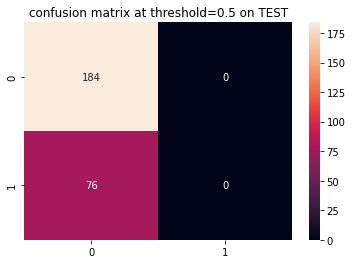

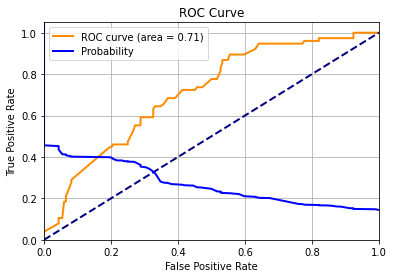

AUC: 0.712
Brier Score: 0.188


GradientBoostingClassifier  performance on train
accuracy:  0.7073170731707317
precision:  0.0
recall:  0.0
f1_score:  0.5860627177700348


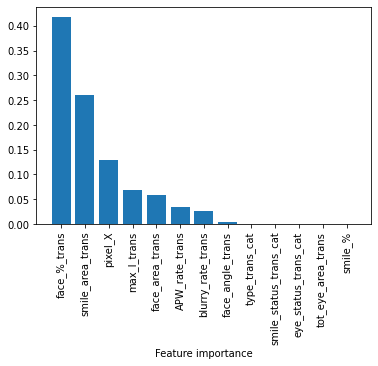

(260, 15)


In [259]:
params={}
log_model,scaler, df_ok= modeling_resamp(data_set_train, None, GradientBoostingClassifier, 'GradientBoostingClassifier', params,0.5, 'YES', random_grid)

(779, 15) (260, 15)


MLPClassifier  performance on test
accuracy:  0.6961538461538461
precision:  0.4594594594594595
recall:  0.2236842105263158
f1_score:  0.6582779573930015


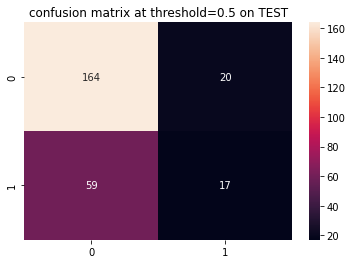

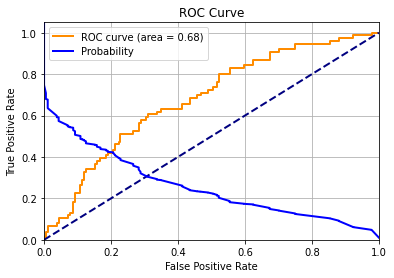

AUC: 0.681
Brier Score: 0.192


MLPClassifier  performance on train
accuracy:  0.7432605905006419
precision:  0.6166666666666667
recall:  0.32456140350877194
f1_score:  0.7148795084417074
(260, 15)


In [234]:
params={}
log_model,scaler, df_ok= modeling_resamp(data_set_train, None, MLPClassifier, 'MLPClassifier', params)

#### Step2.1 Decision tree classification
decisional features:  
1. face_%
2. blurry_rate  
3. smile_area%  


In [56]:

clf = DecisionTreeClassifier(max_depth=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred), "f1_score:",f1_score(y_test,y_pred))

Accuracy: 0.6645435244161358 f1_score: 0.368


In [59]:
f1_score_dec_tree=[]
f1_score_dec_tree_train=[]
for i in range(2,100):
    clf = DecisionTreeClassifier(max_depth=100)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    y_pred_train=clf.predict(X_train)
    f1_score_dec_tree.append(f1_score(y_test,y_pred))
    f1_score_dec_tree_train.append(f1_score(y_train,y_pred_train))

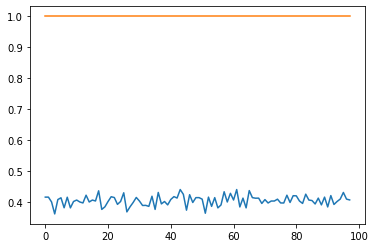

In [60]:
plt.plot(f1_score_dec_tree)
plt.plot(f1_score_dec_tree_train)

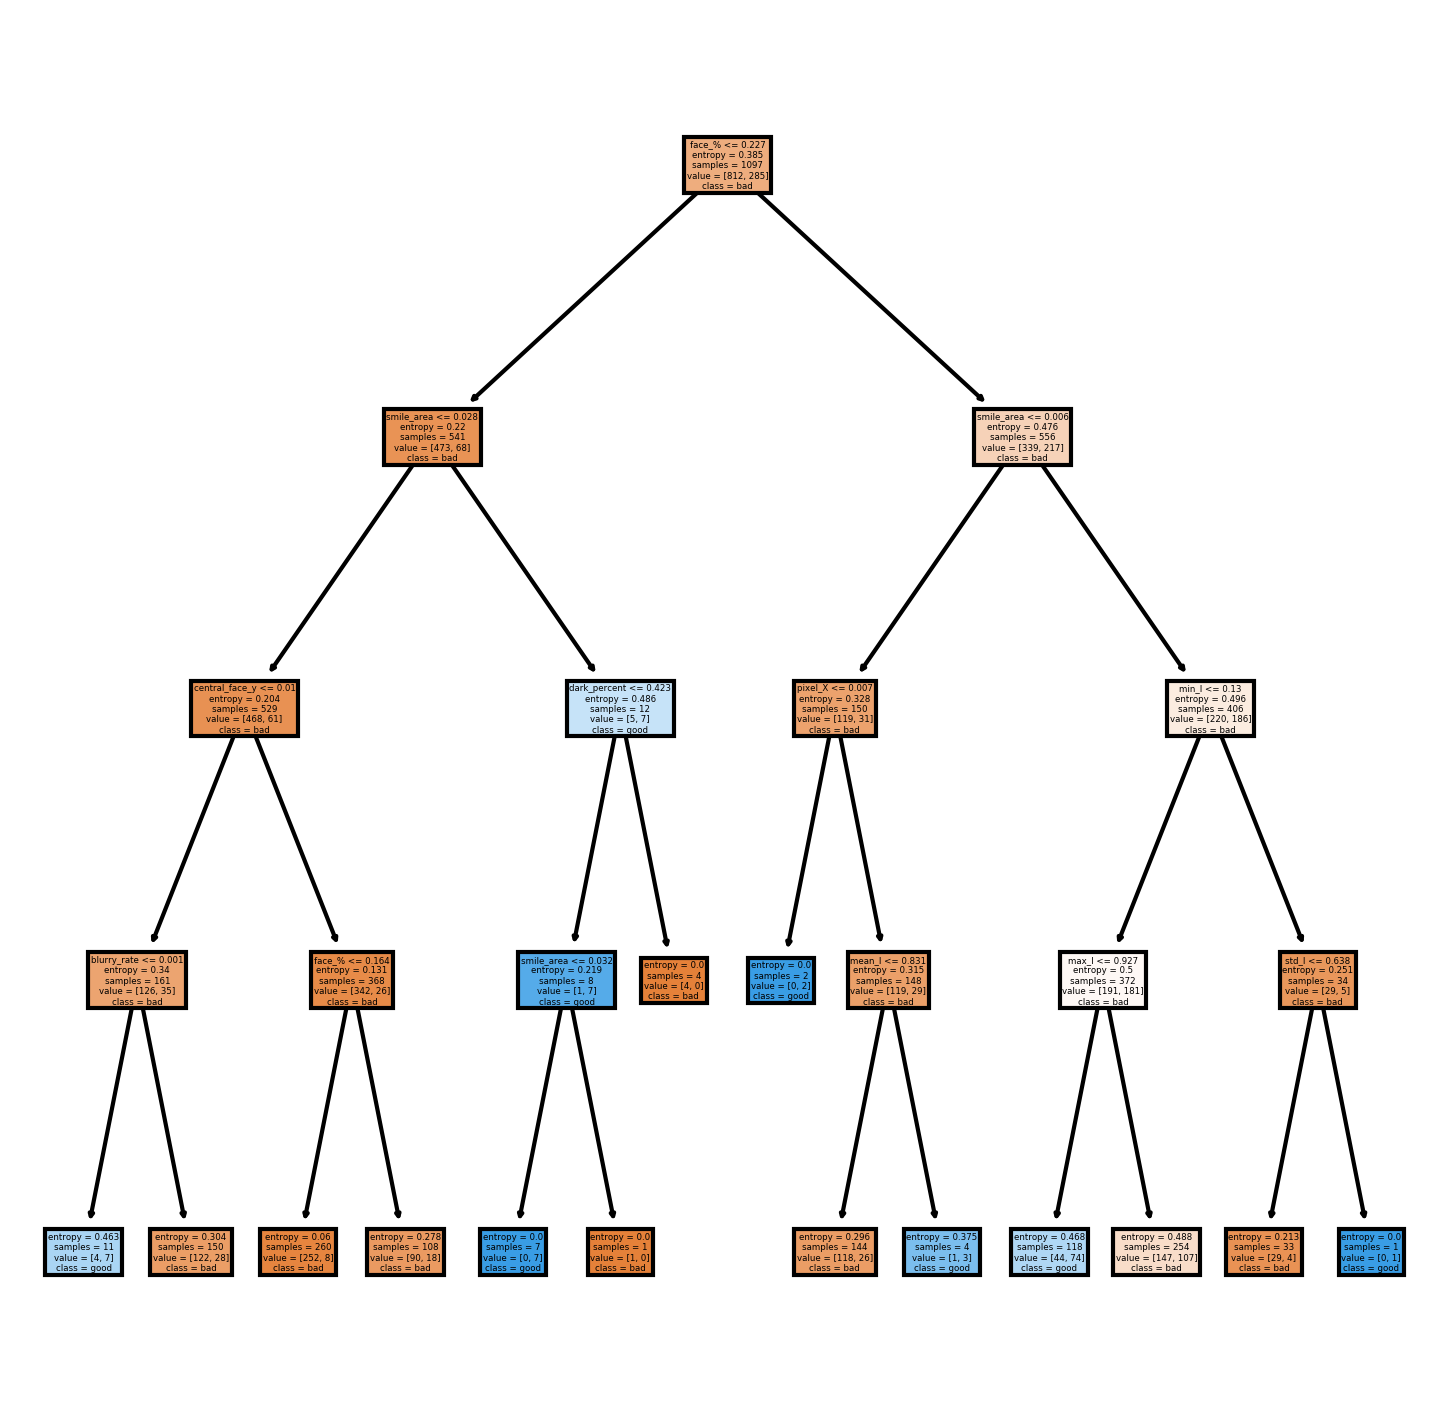

In [35]:
#we plot it
from sklearn import tree
fn=X.columns.tolist()
cn=['bad','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('portrait_decision_tree.png')

#### Step2.2 other algo classification comparison

In [36]:
gb = GradientBoostingClassifier(n_estimators=200, random_state=2018)
rf = RandomForestClassifier(n_estimators=50, max_depth=10,min_samples_split=2,random_state=2)
knn = KNeighborsClassifier(n_neighbors=2)
nn = MLPClassifier((64,64, 32), early_stopping=False, max_iter=2000, random_state=2)
svc= SVC(gamma='scale', C=100)

Results = pd.DataFrame({'Model': [],'Accuracy Score': [], 'f1_score':[]})

gb.fit(X_train, y_train)
Y_pred= gb.predict(X_test)
res = pd.DataFrame({"Model":['GradientBoostingClassifier'],
                    "Accuracy Score": [accuracy_score(y_test,Y_pred)], "f1_score":[f1_score(y_test,Y_pred)]})
Results = Results.append(res)

rf.fit(X_train, y_train)
Y_pred= rf.predict(X_test)
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(y_test,Y_pred)], "f1_score":[f1_score(y_test,Y_pred)]})
Results = Results.append(res)

knn.fit(X_train, y_train)
Y_pred= knn.predict(X_test)
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(y_test,Y_pred)], "f1_score":[f1_score(y_test,Y_pred)]})
Results = Results.append(res)

nn.fit(X_train, y_train)
Y_pred= nn.predict(X_test)
res = pd.DataFrame({"Model":['NeuralNetwork'],
                    "Accuracy Score": [accuracy_score(y_test,Y_pred)], "f1_score":[f1_score(y_test,Y_pred)]})
Results = Results.append(res)

svc.fit(X_train, y_train)
Y_pred= svc.predict(X_test)
res = pd.DataFrame({"Model":['SVC'],
                    "Accuracy Score": [accuracy_score(y_test,Y_pred)], "f1_score":[f1_score(y_test,Y_pred)]})
Results = Results.append(res)

Results

,Model,Accuracy Score,f1_score
0,GradientBoostingClassifier,0.753715,0.431373
0,RandomForestClassifier,0.745223,0.347826
0,KNeighborsClassifier,0.736730,0.318681
0,NeuralNetwork,0.711253,0.464567
0,SVC,0.734607,0.358974


In [37]:
#lets improve the RF classifier with a grid search and 50 splits for 4 and 5 axles only



Results=[]

X=data_set.drop(['filename','label_portrait'],axis=1)
y=data_set['label_portrait']

#apply SelectKBest class to extract top 10% best features
#my_k=int(50*X.shape[1]/100)
#selector = SelectKBest(score_func=chi2, k=my_k)
#new_X = selector.fit_transform(X.abs(),y)

# Get columns to keep and create new dataframe with those only
#cols = selector.get_support(indices=True)
#X_new = X.iloc[:,cols]
X_new=X

for i in range(50):
    state = i
    standard_scaler=StandardScaler()
    X_scale=minMax_scaler.fit_transform(X_new)
    #print(Y.shape)
    X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.3,random_state=state, stratify=y)
    #print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
    
    rf = RandomForestClassifier(n_estimators=50, max_depth=10,min_samples_split=10,random_state=state)
    rf.fit(X_train, y_train)
    Y_pred= rf.predict(X_test)
    n_y=Y_pred.shape
    acc_scor=accuracy_score(y_test,Y_pred)
    my_f1_scor=f1_score(y_test,Y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
    Results.append([acc_scor,my_f1_scor,tn,fp,fn,tp])

my_results=pd.DataFrame(Results,columns=['accuracy_score','f1_score','True_Negative','False_Positive','False_Negative','True_Positive'])
print('RF results:\n',my_results.mean())
display(my_results)

RF results:
 accuracy_score      0.755456
f1_score            0.341692
True_Negative     325.700000
False_Positive     22.300000
False_Negative     92.880000
True_Positive      30.120000
dtype: float64


,accuracy_score,f1_score,True_Negative,False_Positive,False_Negative,True_Positive
0,0.751592,0.367568,320,28,89,34
1,0.768577,0.362573,331,17,92,31
2,0.770701,0.386364,329,19,89,34
3,0.755839,0.350282,325,23,92,31
4,0.760085,0.368715,325,23,90,33
5,0.743100,0.229299,332,16,105,18
6,0.745223,0.310345,324,24,96,27
7,0.762208,0.363636,327,21,91,32
8,0.751592,0.374332,319,29,88,35
9,0.760085,0.375691,324,24,89,34


In [38]:
#lets improve the SVC classifier with a grid search and 50 splits for 4 and 5 axles only
Results=[]

X=data_set.drop(['filename','label_portrait'],axis=1)
y=data_set['label_portrait']

#apply SelectKBest class to extract top 10% best features
#my_k=int(50*X.shape[1]/100)
#selector = SelectKBest(score_func=chi2, k=my_k)
#new_X = selector.fit_transform(X.abs(),y)

# Get columns to keep and create new dataframe with those only
#cols = selector.get_support(indices=True)
#X_new = X.iloc[:,cols]
X_new=X

for i in range(50):
    state = i
    standard_scaler=StandardScaler()
    X_scale=minMax_scaler.fit_transform(X_new)
    #print(Y.shape)
    X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.3,random_state=state, stratify=y)
    #print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
    
    svc= SVC(gamma='scale', C=100)
    svc.fit(X_train, y_train)
    Y_pred= svc.predict(X_test)
    n_y=Y_pred.shape
    acc_scor=accuracy_score(y_test,Y_pred)
    my_f1_scor=f1_score(y_test,Y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
    Results.append([acc_scor,my_f1_scor,tn,fp,fn,tp])

my_results=pd.DataFrame(Results,columns=['accuracy_score','f1_score','True_Negative','False_Positive','False_Negative','True_Positive'])
print('SVC results:\n',my_results.mean())
display(my_results)

SVC results:
 accuracy_score      0.728365
f1_score            0.335907
True_Negative     310.460000
False_Positive     37.540000
False_Negative     90.400000
True_Positive      32.600000
dtype: float64


,accuracy_score,f1_score,True_Negative,False_Positive,False_Negative,True_Positive
0,0.709130,0.331707,300,48,89,34
1,0.732484,0.322581,315,33,93,30
2,0.740977,0.273810,326,22,100,23
3,0.721868,0.328205,308,40,91,32
4,0.736730,0.367347,311,37,87,36
5,0.728238,0.304348,315,33,95,28
6,0.728238,0.333333,311,37,91,32
7,0.711253,0.291667,307,41,95,28
8,0.740977,0.424528,304,44,78,45
9,0.726115,0.302703,314,34,95,28


In [39]:
#lets improve the LR classifier with a grid search and 50 splits for 4 and 5 axles only
Results=[]

X=data_set.drop(['filename','label_portrait'],axis=1)
y=data_set['label_portrait']

#apply SelectKBest class to extract top 10% best features
my_k=int(100*X.shape[1]/100)
selector = SelectKBest(score_func=chi2, k=my_k)
new_X = selector.fit_transform(X.abs(),y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_new = X.iloc[:,cols]

for i in range(50):
    state = i
    #standard_scaler=StandardScaler()
    minMax_scaler=MinMaxScaler()
    X_scale=minMax_scaler.fit_transform(X_new)
    #print(Y.shape)
    X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.3,random_state=state, stratify=y)
    #print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
    
    clf = LogisticRegression(random_state=state, C=1000, solver='lbfgs')
    clf.fit(X_train, y_train)
    Y_pred= clf.predict(X_test)
    Y_pred_proba=clf.predict_proba(X_test)
    my_pred=pd.DataFrame([])
    my_pred["y_test"]=y_test.tolist()
    my_pred["y_pred"]=Y_pred.tolist()
    my_pred["y_pred_proba"]=Y_pred_proba[:,1].tolist()
    my_pred['new_y_pred']=[1 if i>0.35 else 0 for i in my_pred.y_pred_proba]
    n_y=Y_pred.shape
    acc_scor=accuracy_score(y_test,Y_pred)
    my_f1_scor=f1_score(y_test,Y_pred)
    my_new_f1_scor=f1_score(y_test,my_pred['new_y_pred'].tolist())
    tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
    tn_new, fp_new, fn_new, tp_new = confusion_matrix(y_test, my_pred['new_y_pred'].tolist()).ravel()
    mean_prob_1, mean_prob_0=np.mean(my_pred[my_pred.y_test==1].y_pred_proba),np.mean(my_pred[my_pred.y_test==0].y_pred_proba)
    Results.append([acc_scor,my_f1_scor,tn,fp,fn,tp, mean_prob_1, mean_prob_0,my_new_f1_scor,tn_new, fp_new, fn_new, tp_new])

my_results=pd.DataFrame(Results,columns=['accuracy_score','f1_score','True_Negative','False_Positive','False_Negative','True_Positive', 'mean_prob_1','mean_prob_0','new_f1_score','True_Negative','False_Positive','False_Negative','True_Positive'])
print('RF results:\n',my_results.mean())
display(my_results)

RF results:
 accuracy_score      0.733588
f1_score            0.234702
True_Negative     326.180000
False_Positive     21.820000
False_Negative    103.660000
True_Positive      19.340000
mean_prob_1         0.339345
mean_prob_0         0.232506
new_f1_score        0.457184
True_Negative     281.660000
False_Positive     66.340000
False_Negative     66.860000
True_Positive      56.140000
dtype: float64


,accuracy_score,f1_score,True_Negative,False_Positive,False_Negative,True_Positive,mean_prob_1,mean_prob_0,new_f1_score,True_Negative,False_Positive,False_Negative,True_Positive
0,0.717622,0.231214,318,30,103,20,0.343613,0.237392,0.417671,274,74,71,52
1,0.730361,0.230303,325,23,104,19,0.317313,0.226934,0.418410,282,66,73,50
2,0.747346,0.232258,334,14,105,18,0.357587,0.233624,0.514056,286,62,59,64
3,0.726115,0.218182,324,24,105,18,0.341196,0.223278,0.471616,296,52,69,54
4,0.713376,0.219653,317,31,104,19,0.353497,0.248928,0.462121,268,80,62,61
5,0.740977,0.282353,325,23,99,24,0.345699,0.237890,0.442688,274,74,67,56
6,0.719745,0.185185,324,24,108,15,0.332044,0.227280,0.448980,281,67,68,55
7,0.709130,0.217143,315,33,104,19,0.335872,0.237496,0.406639,279,69,74,49
8,0.730361,0.282486,319,29,98,25,0.360123,0.241787,0.446970,266,82,64,59
9,0.743100,0.300578,324,24,97,26,0.357015,0.242446,0.474708,275,73,62,61


In [40]:
np.mean(my_pred[my_pred.y_test==1].y_pred_proba),np.mean(my_pred[my_pred.y_test==0].y_pred_proba)

(0.3221725193916565, 0.23344786226032574)

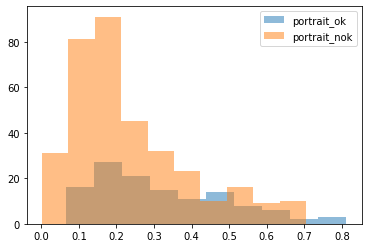

In [41]:
plt.hist(my_pred[my_pred.y_test==1].y_pred_proba, alpha=0.5, label='portrait_ok')
plt.hist(my_pred[my_pred.y_test==0].y_pred_proba, alpha=0.5, label='portrait_nok')
plt.legend()

In [42]:
#lets improve the NN classifier with a grid search and 50 splits for 4 and 5 axles only
Results=[]

X=data_set.drop(['filename','label_portrait'],axis=1)
y=data_set['label_portrait']

#apply SelectKBest class to extract top 10% best features
#my_k=int(50*X.shape[1]/100)
#selector = SelectKBest(score_func=chi2, k=my_k)
#new_X = selector.fit_transform(X.abs(),y)

# Get columns to keep and create new dataframe with those only
#cols = selector.get_support(indices=True)
#X_new = X.iloc[:,cols]
X_new=X

for i in range(50):
    state = i
    standard_scaler=StandardScaler()
    X_scale=minMax_scaler.fit_transform(X_new)
    #print(Y.shape)
    X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.3,random_state=state, stratify=y)
    #print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
    
    nn = MLPClassifier((64,64, 32), early_stopping=False, max_iter=2000, random_state=2)
    nn.fit(X_train, y_train)
    Y_pred= nn.predict(X_test)
    n_y=Y_pred.shape
    acc_scor=accuracy_score(y_test,Y_pred)
    my_f1_scor=f1_score(y_test,Y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
    Results.append([acc_scor,my_f1_scor,tn,fp,fn,tp])

my_results=pd.DataFrame(Results,columns=['accuracy_score','f1_score','True_Negative','False_Positive','False_Negative','True_Positive'])
print('SVC results:\n',my_results.mean())
display(my_results)

SVC results:
 accuracy_score      0.720552
f1_score            0.425957
True_Negative     290.040000
False_Positive     57.960000
False_Negative     73.660000
True_Positive      49.340000
dtype: float64


,accuracy_score,f1_score,True_Negative,False_Positive,False_Negative,True_Positive
0,0.673036,0.429630,259,89,65,58
1,0.730361,0.454936,291,57,70,53
2,0.745223,0.428571,306,42,78,45
3,0.717622,0.429185,288,60,73,50
4,0.734607,0.429224,299,49,76,47
5,0.726115,0.451064,289,59,70,53
6,0.732484,0.427273,298,50,76,47
7,0.717622,0.434043,287,61,72,51
8,0.715499,0.500000,270,78,56,67
9,0.732484,0.405660,302,46,80,43


#### Combined classifier

In [50]:
#lets improve the NN classifier with a grid search and 50 splits for 4 and 5 axles only
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.pipeline import make_pipeline

from sklearn.svm import SVC, SVR

from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler=StandardScaler()
minMax_scaler=MinMaxScaler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Results=[]

X=data_set.drop(['filename','label_portrait'],axis=1)
y=data_set['label_portrait']

#apply SelectKBest class to extract top 10% best features
#my_k=int(50*X.shape[1]/100)
#selector = SelectKBest(score_func=chi2, k=my_k)
#new_X = selector.fit_transform(X.abs(),y)

# Get columns to keep and create new dataframe with those only
#cols = selector.get_support(indices=True)
#X_new = X.iloc[:,cols]
X_new=X

for i in range(50):
    state = i
    standard_scaler=StandardScaler()
    X_scale=minMax_scaler.fit_transform(X_new)
    #print(Y.shape)
    X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.3,random_state=state, stratify=y)
    #print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
    
    nn = MLPClassifier((64,64,32), early_stopping=False, max_iter=2000, random_state=2)
    nn.fit(X_train, y_train)
    Y_pred_nn= nn.predict(X_test)
    
    svc= SVC(gamma='scale', C=100)
    svc.fit(X_train, y_train)
    Y_pred_svc= svc.predict(X_test)
    
    rf = RandomForestClassifier(n_estimators=50, max_depth=10,min_samples_split=10,random_state=state)
    rf.fit(X_train, y_train)
    Y_pred_rf= rf.predict(X_test)
    
    Y_pred_all=[1 if (Y_pred_nn[i]+Y_pred_svc[i]+Y_pred_rf[i])>=3 else 0 for i in range(len(y_test))]
    
    n_y=Y_pred.shape
    acc_scor=accuracy_score(y_test,Y_pred_all)
    my_f1_scor=f1_score(y_test,Y_pred_all)
    tn, fp, fn, tp = confusion_matrix(y_test, Y_pred_all).ravel()
    Results.append([acc_scor,my_f1_scor,tn,fp,fn,tp])

my_results=pd.DataFrame(Results,columns=['accuracy_score','f1_score','True_Negative','False_Positive','False_Negative','True_Positive'])
print('Combined results:\n',my_results.mean())
display(my_results)

Combined results:
 accuracy_score      0.750234
f1_score            0.194705
True_Negative     339.000000
False_Positive      9.000000
False_Negative    108.640000
True_Positive      14.360000
dtype: float64


,accuracy_score,f1_score,True_Negative,False_Positive,False_Negative,True_Positive
0,0.738854,0.236025,329,19,104,19
1,0.747346,0.190476,338,10,109,14
2,0.751592,0.170213,342,6,111,12
3,0.751592,0.214765,338,10,107,16
4,0.747346,0.179310,339,9,110,13
5,0.745223,0.154930,340,8,112,11
6,0.745223,0.189189,337,11,109,14
7,0.743100,0.153846,339,9,112,11
8,0.757962,0.278481,335,13,101,22
9,0.747346,0.190476,338,10,109,14


### let's see some false positives

In [205]:
y_predicted_proba=clf.predict_proba(X_scale)
y_predicted_final=[1 if i>0.35 else 0 for i in y_predicted_proba[:,1].tolist()]

In [206]:
data_set_wpredict=data_set
data_set_wpredict["y_predicted_final"]=y_predicted_final

In [215]:
fp_list=[data_set_wpredict.filename.iloc[i] for i in range(data_set_wpredict.shape[0]) if ((data_set_wpredict.label_portrait.iloc[i]==0) & (data_set_wpredict.y_predicted_final.iloc[i]==1))]

In [216]:
len(fp_list)

167

In [217]:
fp_list

['28_0_1_20170117021617321.jpg',
 '30_0_0_20170117142111641.jpg',
 '24_1_0_20170116211933213.jpg',
 '40_0_4_20170117013731866.jpg',
 '46_0_0_20170109012425702.jpg',
 '25_0_3_20170117135721856.jpg',
 '51_1_4_20170103234622539.jpg',
 '51_0_4_20170104210348196.jpg',
 '36_0_0_20170104205158732.jpg',
 '24_1_0_20170105183445456.jpg',
 '38_0_1_20170114033516210.jpg',
 '24_1_0_20170108225915369.jpg',
 '45_0_4_20170104202016610.jpg',
 '38_1_1_20170113010502255.jpg',
 '23_1_0_20170103163102400.jpg',
 '27_1_1_20170117013811568.jpg',
 '24_1_0_20170111182452781.jpg',
 '25_0_1_20170116002835308.jpg',
 '53_0_0_20170104204651866.jpg',
 '20_0_3_20170104225831145.jpg',
 '43_0_4_20170104174223892.jpg',
 '42_0_0_20170117185725872.jpg',
 '22_1_4_20170103225112465.jpg',
 '24_1_2_20170116171634283.jpg',
 '20_1_1_20170113005500606.jpg',
 '28_0_2_20170113190312841.jpg',
 '18_1_1_20170114030232014.jpg',
 '17_0_0_20170113132359393.jpg',
 '32_1_1_20170113001310242.jpg',
 '61_1_0_20170110160643735.jpg',
 '28_0_3_2

### Step7: Compare to the "no learning" classification
with 1000 images as input
- "all bad" classification : Accuracy: 0.7083333333333334 , f1_score: 0.0  
- "all good" classification: Accuracy: 0.2916666666666667 , f1_score: 0.45161290322580644  
- random classification with 0.5 probability is Accuracy: 0.4967948717948718 , f1_score: 0.364372469635627  

with 1600 images as input
- "all bad" classification : Accuracy: 0.7388535031847133 , f1_score: 0.0  
- "all good" classification: Accuracy: 0.2611464968152866 , f1_score: 0.41414141414141414  
- random classification with 0.5 probability is Accuracy: 0.5095541401273885 , f1_score: 0.3456090651558074 

In [46]:
#random classification
import random
percent = 0.49
n_length_1 =int(int(y_test.shape[0]) *percent)
n_length_0 =int(int(y_test.shape[0]) *(1-percent))
nums = n_length_1*[1] + n_length_0*[0]
random.shuffle(nums)
if len(nums)>=len(y_test):
    nums=nums[0:len(y_test)+1]
else:
    nums=nums+[0]

my_f1_scor_random=f1_score(y_test,nums)
my_acc_scor_random=accuracy_score(y_test,nums)

print("Accuracy:",my_acc_scor_random,", f1_score:",my_f1_scor_random)

Accuracy: 0.5095541401273885 , f1_score: 0.3456090651558074


In [47]:
# constant 0 prediction
nums_0=np.zeros(y_test.shape[0])
my_f1_scor_ct=f1_score(y_test,nums_0)
my_acc_scor_ct=accuracy_score(y_test,nums_0)
print("Accuracy:",my_acc_scor_ct,", f1_score:",my_f1_scor_ct)

Accuracy: 0.7388535031847133 , f1_score: 0.0


In [48]:
# constant 1 prediction
nums_1=np.ones(y_test.shape[0])
my_f1_scor_ct=f1_score(y_test,nums_1)
my_acc_scor_ct=accuracy_score(y_test,nums_1)
print("Accuracy:",my_acc_scor_ct,", f1_score:",my_f1_scor_ct)

Accuracy: 0.2611464968152866 , f1_score: 0.41414141414141414


### Step - questions ideas:
- compare to constant classification - done
- do combined classification - done
- add more features from pictures
- add more labelled pictures in the dataset 
- add more good "pictures" from my Linkedin network
- explore the main features with decision tree - done